# **Name: PARTHA SAKHA PAUL**
# **ROLL: MA23M016**
# **PDE Assignment 2**

The faces of a thin square plate of length $24 \mathrm{~cm}$ are perfectly insulated (to avoid any atmospherical effects). Assume that the side at $y=24$ is kept at $20^{\circ} \mathrm{C}$ and all the other three sides are kept $0^{\circ} \mathrm{C}$.

The exact solution of the problem is
$$
\Rightarrow u(x, y)=\frac{80}{\pi} \sum_{n=1}^{\infty} \frac{1}{(2 n-1) \pi \sinh (2 n-1) \pi} \sin \frac{(2 n-1) \pi x}{24} \sinh \frac{(2 n-1) \pi y}{24}
$$
# **(a) Discretize the PDE using second order central difference approximations and solve the resultant algebraic equations using Jacobi, Gauss- seidel and SOR methods (Choose the number of grid points in $x$ and $y$ directions as variables and should be fixed during the execution of the code).**

## **Import Necessary Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## **Initialization**

    Set up the grid and define the constants:

In [87]:
# Grid dimensions
L = 24  # length of the square plate in cm
T_top = 20  # temperature at y = L
n = 25  # number of grid points in each dimension (including boundaries)

# Grid spacing
dx = L / (n - 1)

# Initialize the temperature array
u = np.zeros((n, n))

# Apply boundary conditions
u[:, 0] = 0   # u(x, 0) = 0°C
u[0, :] = 0   # u(0, y) = 0°C
u[:, -1] = 0  # u(L, y) = 0°C
u[-1, :] = T_top  # u(x, L) = 20°C

## **Iterative Methods**

    Define functions for Jacobi, Gauss-Seidel, and SOR methods:

### **Jacobi Method**

In [88]:
def jacobi(u, tolerance=1e-4, max_iterations=1000):
    u_new = np.copy(u)  # Create a copy of the temperature matrix to update during iterations
    iterations = 0  # Initialize iteration counter

    while True:  # Start an indefinite loop until break
        # Update the temperature values for interior grid points
        for i in range(1, n-1):
            for j in range(1, n-1):
                u_new[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])

        # Check for convergence by comparing current and previous iterates
        if np.max(np.abs(u - u_new)) < tolerance:
            break  # Break the loop if the maximum change is below the tolerance

        # Swap references of u and u_new for the next iteration
        u, u_new = u_new, u

        # Increment the iteration count
        iterations += 1
        # Break if the number of iterations exceeds the set maximum
        if iterations >= max_iterations:
            break

    return u_new, iterations  # Return the computed solution and the number of iterations


### **Gauss-Seidel Method**

In [89]:
def gauss_seidel(u, tolerance=1e-4, max_iterations=1000):
    iterations = 0  # Initialize iteration counter

    while True:  # Start an indefinite loop until break
        diff = 0  # Initialize the maximum difference in this iteration

        # Update grid points directly in the array u
        for i in range(1, n-1):
            for j in range(1, n-1):
                old_value = u[i, j]  # Store old temperature value for convergence check
                u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
                diff = max(diff, abs(old_value - u[i, j]))  # Update the max change

        # Check for convergence
        if diff < tolerance:
            break  # Break the loop if changes are under the tolerance

        # Increment the iteration count
        iterations += 1
        # Break if the number of iterations exceeds the set maximum
        if iterations >= max_iterations:
            break

    return u, iterations  # Return the modified temperature array and the iteration count


### **SOR Method**

In [122]:
def SOR(u, omega=1.5, tolerance=1e-4, max_iterations=1000):
    iterations = 0  # Initialize iteration counter

    while True:  # Start an indefinite loop until break
        diff = 0  # Initialize the maximum difference in this iteration

        # Perform the SOR updates directly on the grid
        for i in range(1, n-1):
            for j in range(1, n-1):
                old_value = u[i, j]  # Store old temperature value for convergence check
                u[i, j] = (1 - omega) * u[i, j] + omega * 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
                diff = max(diff, abs(old_value - u[i, j]))  # Update the max change

        # Check for convergence
        if diff < tolerance:
            break  # Break the loop if the changes are under the tolerance

        # Increment the iteration count
        iterations += 1
        # Break if the number of iterations exceeds the set maximum
        if iterations >= max_iterations:
            break

    return u, iterations  # Return the modified temperature array and the iteration count


## **Run Methods**

In [123]:
# Perform the Jacobi iterative method on a copy of the initial temperature grid
u_jacobi, jacobi_iters = jacobi(np.copy(u))
# Print the results indicating the number of iterations Jacobi method took to converge
print(f"Jacobi completed in {jacobi_iters} iterations")

# Perform the Gauss-Seidel iterative method on a copy of the initial temperature grid
u_gs, gs_iters = gauss_seidel(np.copy(u))
# Print the results indicating the number of iterations Gauss-Seidel method took to converge
print(f"Gauss-Seidel completed in {gs_iters} iterations")

# Perform the Successive Over-Relaxation (SOR) method on a copy of the initial temperature grid
u_sor, sor_iters = SOR(np.copy(u))
# Print the results indicating the number of iterations SOR method took to converge
print(f"SOR completed in {sor_iters} iterations")
print('\n\nOne comparison of the solutions of the three methods')
print(u_jacobi[5])
print(u_gs[5])
print(u_sor[5])


Jacobi completed in 761 iterations
Gauss-Seidel completed in 427 iterations
SOR completed in 164 iterations


One comparison of the solutions of the three methods
[0.         0.20348154 0.40320615 0.59552486 0.77699616 0.94446645
 1.09513167 1.22657175 1.33676888 1.42410309 1.4873433  1.52562629
 1.53844374 1.52562629 1.4873433  1.42410309 1.33676888 1.22657175
 1.09513167 0.94446645 0.77699616 0.59552486 0.40320615 0.20348154
 0.        ]
[0.         0.2038729  0.40399111 0.59669875 0.77854686 0.94637522
 1.09737233 1.22911231 1.33957049 1.4271223  1.49053097 1.5289303
 1.54180786 1.52899321 1.49065355 1.42729818 1.33979033 1.22936408
 1.09764165 0.94664576 0.77880086 0.5969175  0.40415554 0.20396414
 0.        ]
[0.         0.20418616 0.4046146  0.59762375 0.7797591  0.94785514
 1.09909542 1.23104955 1.3416889  1.42938555 1.49290005 1.53136421
 1.54426441 1.53142974 1.49302779 1.42956894 1.3419183  1.23131251
 1.09937704 0.94813843 0.7800255  0.59785359 0.40478771 0.20428243
 0.     

## **Plot Results**

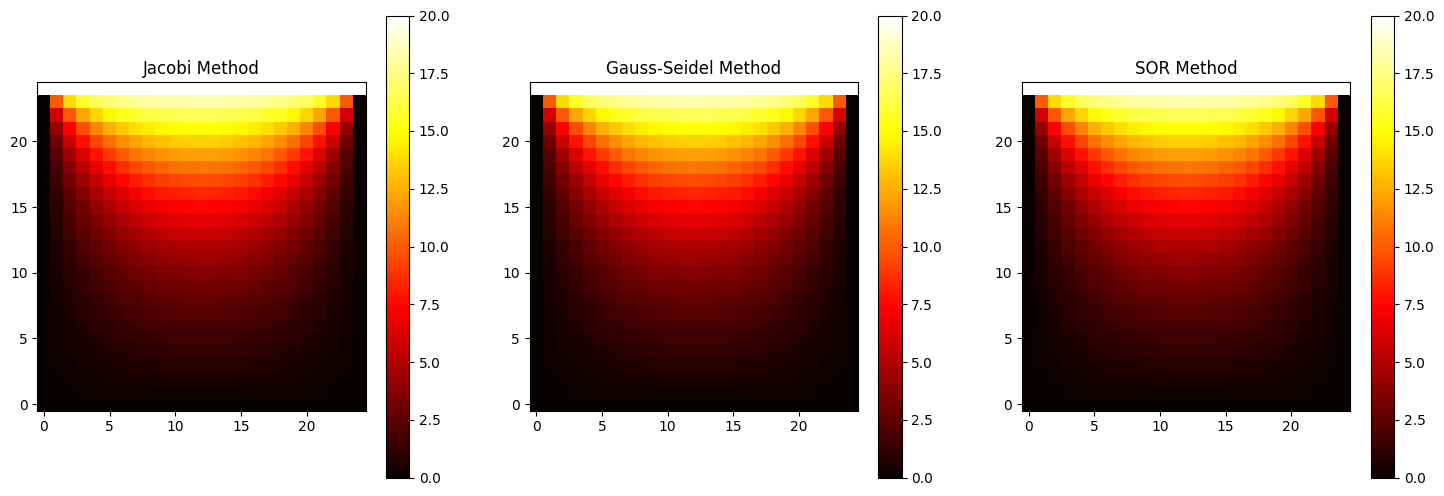

In [124]:
# Set up a figure with a specific size to hold all subplots
plt.figure(figsize=(18, 6))

# Define the first subplot for the Jacobi method results
plt.subplot(1, 3, 1)  # (1, 3, 1) indicates 1 row, 3 columns, 1st subplot
plt.imshow(u_jacobi, cmap='hot', interpolation='nearest', origin='lower')  # Display the temperature grid using a heatmap
plt.title('Jacobi Method')  # Set the title of this subplot
plt.colorbar()  # Add a color bar to the right side of the subplot, indicating the scale of temperature values

# Define the second subplot for the Gauss-Seidel method results
plt.subplot(1, 3, 2)  # 2nd subplot in a 1 row, 3 column grid
plt.imshow(u_gs, cmap='hot', interpolation='nearest', origin='lower')  # Display the temperature grid using a heatmap
plt.title('Gauss-Seidel Method')  # Set the title of this subplot
plt.colorbar()  # Add a color bar to indicate temperature values

# Define the third subplot for the SOR method results
plt.subplot(1, 3, 3)  # 3rd subplot in a 1 row, 3 column grid
plt.imshow(u_sor, cmap='hot', interpolation='nearest', origin='lower')  # Display the temperature grid using a heatmap
plt.title('SOR Method')  # Set the title of this subplot
plt.colorbar()  # Add a color bar to indicate temperature values

# Display all subplots
plt.show()


#**(b) Compare your numerical solutions with the given exact solution and compute the absolute error for every case**

## **Computing the Exact Solution**

    Let's first code a function to compute the exact solution at any given point (x,y) based on the provided series:

In [125]:

def exact_solution(x, y, terms=100):
    """
    Calculate the exact solution of the boundary value problem for a given x, y using Fourier series.

    Args:
    x (float or array): x-coordinate(s) at which to evaluate the solution.
    y (float or array): y-coordinate(s) at which to evaluate the solution.
    terms (int): Number of terms to include in the Fourier series approximation.

    Returns:
    float or array: The calculated temperature at the given coordinates.
    """
    L = 24  # Length of the domain in cm
    sum_terms = 0  # Initialize the summation of terms in the Fourier series
    for n in range(1, terms + 1, 2):  # Loop only over odd terms
        # Calculate each term in the series:
        term = np.sin(n * np.pi * x / L) * np.sinh(n * np.pi * y / L)
        denominator = n * np.pi * np.sinh(n * np.pi)
        sum_terms += term / denominator  # Accumulate the sum of the terms
    return (80 / np.pi) * sum_terms  # Scale the sum to get the temperature

# Set the number of grid points
n = 25  # Define the grid size (e.g., 25x25 grid)
L = 24  # Length of each side of the square domain in cm

# Generate the exact solution over the grid
u_exact = np.zeros((n, n))  # Initialize the matrix to store the exact solution
x = np.linspace(0, L, n)  # Generate linearly spaced points along x
y = np.linspace(0, L, n)  # Generate linearly spaced points along y

for i in range(n):
    for j in range(n):
        u_exact[i, j] = exact_solution(x[i], y[j])  # Compute the exact solution at each grid point

# The array u_exact now contains the exact temperature distribution


## **Calculate Mean Absolute Errors**

    After computing the numerical solutions and the exact solution, calculate the mean absolute errors:

In [128]:
def absolute_error(u_numeric, u_exact):
    return np.abs(u_numeric - u_exact)

# Calculate errors
error_jacobi = absolute_error(u_jacobi, u_exact)
error_gs = absolute_error(u_gs, u_exact)
error_sor = absolute_error(u_sor, u_exact)

# Print maximum errors
print("Mean Absolute Error (Jacobi):", np.mean(error_jacobi))
print("Mean Absolute Error (Gauss-Seidel):", np.mean(error_gs))
print("Mean Absolute Error (SOR):", np.mean(error_sor))


Mean Absolute Error (Jacobi): 4.761092143389664
Mean Absolute Error (Gauss-Seidel): 4.762556664919668
Mean Absolute Error (SOR): 4.763569793215673


## **Visualization of Errors with Solutions**

    Visualize the errors to understand where the numerical solutions diverge from the exact solution:

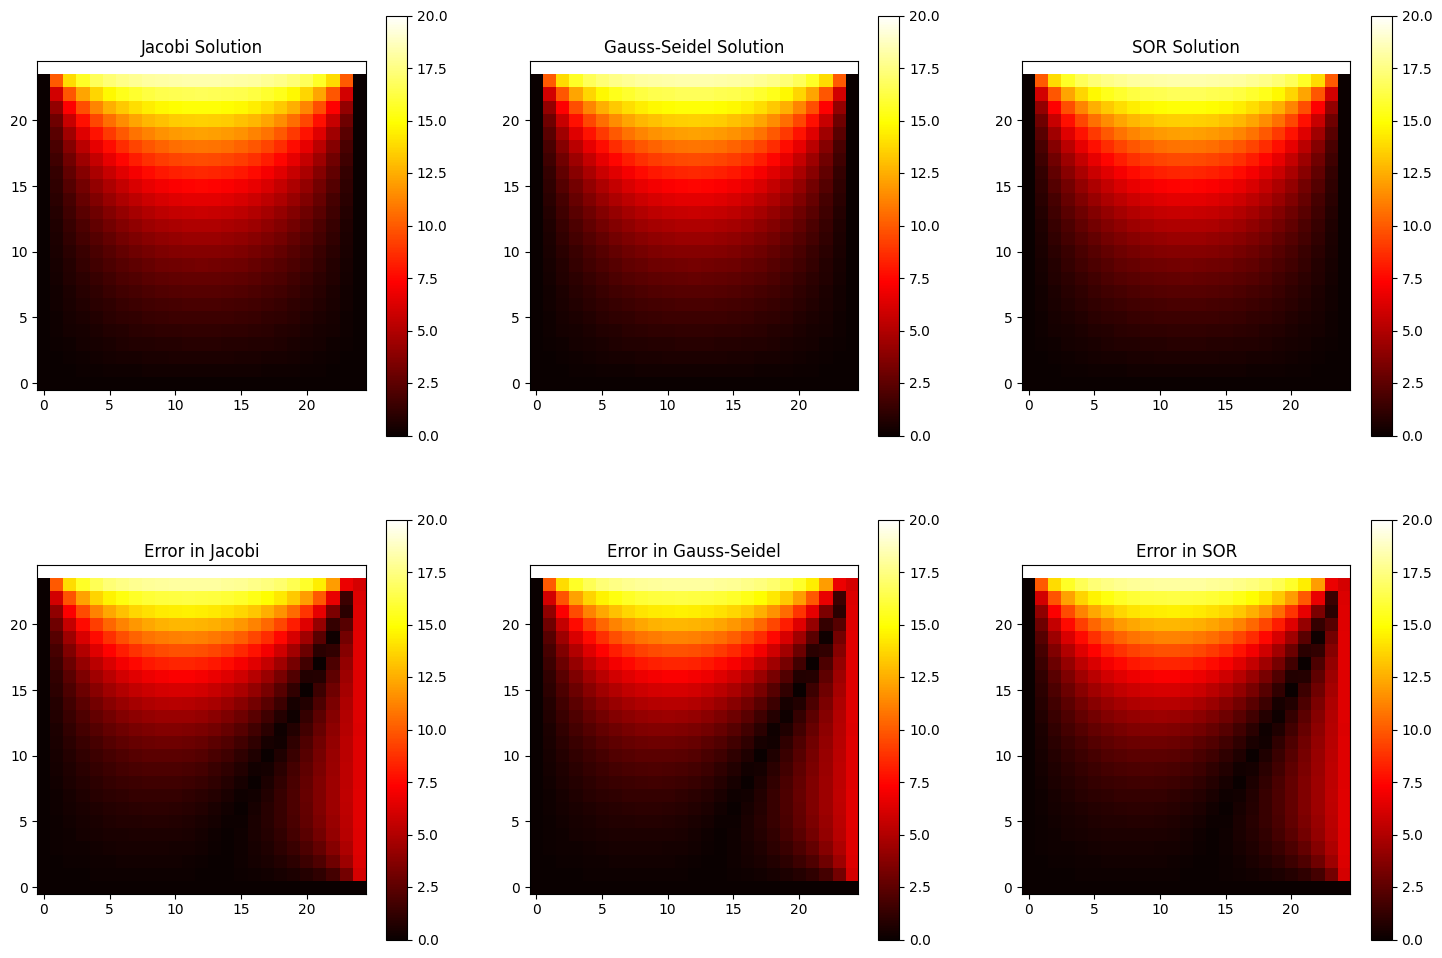

In [127]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(u_jacobi, cmap='hot', interpolation='nearest', origin='lower')
plt.title('Jacobi Solution')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(u_gs, cmap='hot', interpolation='nearest', origin='lower')
plt.title('Gauss-Seidel Solution')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(u_sor, cmap='hot', interpolation='nearest', origin='lower')
plt.title('SOR Solution')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(error_jacobi, cmap='hot', interpolation='nearest', origin='lower')
plt.title('Error in Jacobi')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(error_gs, cmap='hot', interpolation='nearest', origin='lower')
plt.title('Error in Gauss-Seidel')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(error_sor, cmap='hot', interpolation='nearest', origin='lower')
plt.title('Error in SOR')
plt.colorbar()

plt.show()
